# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key
from pprint import pprint


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#--------------------------------------------------------------------------
#If City Data.csv is already in the repository and up to date, do not run this call function
#skip down to "plottting the data"
#--------------------------------------------------------------------------
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
#query_url = f"{url}appid={api_key}&q=&units={units}&q="

print("Beginning Data Retrieval")
print("-----------------------------")

#Sets up list to hold response data
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Long = []
MaxTemp = []
WindSpeed = []

for city in cities: 
    try:
        query_url = url + "appid=" + api_key + "&q=" + city +"&units=" + units
        response = requests.get(query_url).json()
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        #Country.append(response['sys']['country'])
        #Date.append(response['sys']['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Long.append(response['coord']['lon'])
        MaxTemp.append(response['main']['temp_max'])
        WindSpeed.append(response['wind']['speed'])
        print(f"Processing Record {city}")
    except:
        print("City not found. Skipping....")

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

city_df = {
    "City": City,
    'Cloudiness' : Cloudiness,
    'Humidity': Humidity,
    'Lat' : Lat,
    'Long' : Long,
    'Max Temp' : MaxTemp,
    'Wind Speed' : WindSpeed,
    
}

Beginning Data Retrieval
-----------------------------
Processing Record east london
Processing Record kapaa
Processing Record lompoc
Processing Record bourail
Processing Record ribeira grande
Processing Record hithadhoo
Processing Record belmonte
Processing Record bluff
City not found. Skipping....
Processing Record grindavik
Processing Record iquitos
Processing Record srednekolymsk
City not found. Skipping....
Processing Record tuktoyaktuk
Processing Record leningradskiy
Processing Record port alfred
Processing Record sovetskiy
Processing Record turukhansk
Processing Record tasiilaq
Processing Record mataura
Processing Record nikolskoye
Processing Record ninotsminda
Processing Record huarmey
Processing Record oksfjord
City not found. Skipping....
Processing Record bethel
Processing Record dikson
Processing Record enfield
Processing Record tautira
Processing Record nishihara
Processing Record tenenkou
City not found. Skipping....
Processing Record longyearbyen
Processing Record puerto

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df = pd.DataFrame(city_df)
city_df.to_csv('City Data.csv', index=False, header=True)

city_df.head()

,City,Cloudiness,Humidity,Lat,Long,Max Temp,Wind Speed
0,East London,0,99,-33.02,27.91,73.10,17.67
1,Kapaa,40,62,22.08,-159.32,78.08,6.93
2,Lompoc,90,76,34.64,-120.46,60.98,3.36
3,Bourail,48,100,-21.57,165.50,73.87,2.57
4,Ribeira Grande,20,77,38.52,-28.70,60.80,20.80


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

There is a clear observable relationship with this data to relate Temperature with Latitude. The further you travel away from the equator the colder it gets. There appears to be a stronger relationship the more north you go due to it currently January


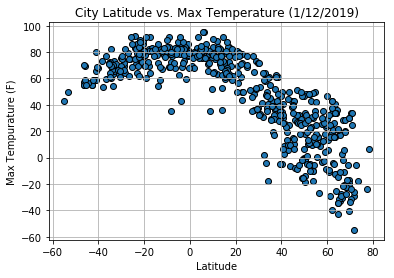

In [27]:
#Reades the CSV that was saved before. If you run the API steps before, please append the date in the chart titles to the current date. 
city_data_csv = pd.read_csv('City Data.csv')

#Sets up the axsis
x_axis = city_data_csv["Lat"]
y_axis = city_data_csv['Max Temp']

#Creates the chart
plt.scatter(x_axis, y_axis, edgecolor="black")

#Creates the formmatting
plt.title("City Latitude vs. Max Temperature (1/12/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Tempurature (F)")
plt.grid(b=True)

#saves the figure
plt.savefig("Latitude vs. Max Temperature.png")

#Analysis
print("There is a clear observable relationship with this data to relate Temperature with Latitude. The further you travel away from the equator the colder it gets. There appears to be a stronger relationship the more north you go due to it currently January.")

#### Latitude vs. Humidity Plot

There is a slight observable relationship with this data to relate Humidity with Latitude


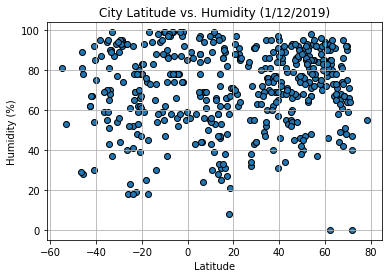

In [26]:
#Sets up the axsis and removes values greater that 100% humidity
city_data_csv = city_data_csv[(city_data_csv["Humidity"] < 100)]

x_axis = city_data_csv["Lat"]
y_axis = city_data_csv['Humidity']

#Creates the chart
plt.scatter(x_axis, y_axis, edgecolor="black")

#Creates the formmatting
plt.title("City Latitude vs. Humidity (1/12/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True)

#saves the figure
plt.savefig("Latitude vs. Humidity.png")

#Analysis
print("There is a slight observable relationship with this data to relate Humidity with Latitude")

#### Latitude vs. Cloudiness Plot

There is no observable relationship with this data to relate Cloudiness with latitude


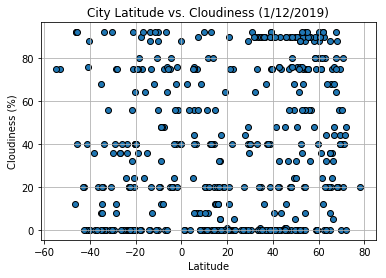

In [25]:
#Sets up the axsis and removes values greater that 100% Cloudiness
city_data_csv = city_data_csv[(city_data_csv["Cloudiness"] < 100)]

x_axis = city_data_csv["Lat"]
y_axis = city_data_csv['Cloudiness']

#Creates the chart
plt.scatter(x_axis, y_axis, edgecolor="black")

#Creates the formmatting
plt.title("City Latitude vs. Cloudiness (1/12/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True)

#saves the figure
plt.savefig("Latitude vs. Cloudiness.png")

#Analysis
print("There is no observable relationship with this data to relate Cloudiness with latitude")


#### Latitude vs. Wind Speed Plot

There is no observable relationship with this data to relate Wind Speed with latitude


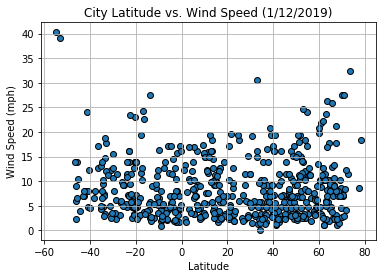

In [28]:
#Sets up the axsis 
x_axis = city_data_csv["Lat"]
y_axis = city_data_csv['Wind Speed']

#Creates the chart
plt.scatter(x_axis, y_axis, edgecolor="black")

#Creates the formmatting
plt.title("City Latitude vs. Wind Speed (1/12/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True)

#saves the figure
plt.savefig("Latitude vs. Wind Speed.png")

#Analysis
print("There is no observable relationship with this data to relate Wind Speed with latitude")